In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [13]:
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data', train=False,download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize((0.1307,),(0.3081,))
                              ])),
batch_size=100, shuffle=True)

In [14]:
class NeuralNet(nn.Module):
    # inizialization of network layer
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    # function descibing Input data path through net
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [15]:
input_size, hidden_size, num_classes = 784, 500, 10
net = NeuralNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
net.load_state_dict(torch.load('./model/fnn_model.pkl'))

<All keys matched successfully>

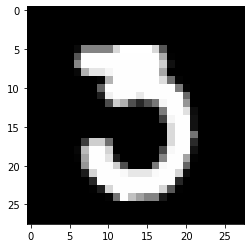

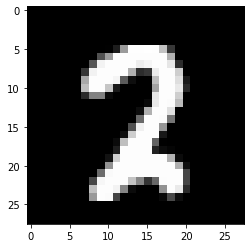

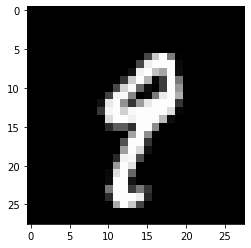

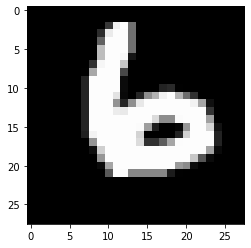

In [50]:
import matplotlib.pyplot as plt
import numpy as np


dataiter = iter(test_loader)
images,labels  = dataiter.next()
# print images
for i in range(4):
    plt.imshow(images[i].reshape(28,28), cmap="gray")
    plt.show()
for img in images:    
    img = (img.view(-1, 28*28))

In [51]:
classes = test_loader.dataset.targets.numpy()

In [62]:
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(10)))

GroundTruth:  tensor(3) tensor(2) tensor(9) tensor(6) tensor(2) tensor(7) tensor(6) tensor(3) tensor(8) tensor(9)


In [63]:
from torch.autograd import Variable
images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
labels = Variable(labels)

In [64]:
outputs = net(images)

In [66]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j]
                              for j in range(10)))

Predicted:  tensor(3) tensor(2) tensor(9) tensor(6) tensor(2) tensor(7) tensor(6) tensor(3) tensor(8) tensor(9)


In [70]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = Variable(images.view(-1, 28*28))         
        labels = Variable(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
